
# **PROJECT NAME:  DIABETES RISK ANALYSIS**

--------------------------------------------------------------------------------------------------------------------------------------------

**Project Type:** Exploratory Data Analysis (EDA) + Hypothesis Testing + Interactive visualisations.

**Contribution:** Individual

# **Submitted by:** Fida Taneem  

--------------------------------------------------------------------------------------------------------------------------------------------




# **Project Summary**

-----------------------------------------------------------------------------------

### **Objective:**  
Perform a detailed EDA on the Diabetes dataset to:  
1. Understand the distribution and characteristics of health features.  
2. Explore relationships between features and the presence of diabetes (Outcome).  
3. Provide insights into key risk factors.  
4. Validate findings using hypothesis testing.  

### **Business Context:**  
Diabetes is a chronic condition affecting millions worldwide. Early detection and analysis of factors such as glucose, BMI, and age can help in:  
- Designing preventive healthcare measures.  
- Informing medical research.  
- Identifying at-risk groups.  

--------------------------------------------------------------------------

### **Subject:** Medical

### **Data Source**: PIMA Dataset From MAchine Learning UCI Repository.

----------------------------------------------------------------------------

# **Data Overview:**

### **About the PIMA Diabetes Dataset**

**Objective**: Predict whether a patient has diabetes based on diagnostic health measurements.

**Population**: Women of Pima Indian heritage, aged 21 years or older.

**Source**: Collected by NIDDK, later made available on the UCI repository.

**Type of Problem**: Binary Classification

**Output variable**: Outcome

1 → Diabetes present

0 → No diabetes

----------------------------------------------------------------------

# **DATA PREPROCESSING**
**1. Data Collection**

Dataset: PIMA Indians Diabetes Database from UCI ML Repository.

768 patient records, 8 independent variables, 1 target (Outcome).

All patients: Pima Indian women aged ≥ 21 years.

**2. Cleaning**

Replace invalid zeros with NaN for: Glucose, BloodPressure, SkinThickness, Insulin, BMI.

Handle missing values using median imputation (robust to skewness).

Standardize column names and check for duplicates.

Verify class balance in target variable (Outcome).

**3. Feature Engineering**

Create Age groups (Young <30, Middle-aged 30–50, Senior >50).

Create Pregnancy bins (0, 1–3, 4+).

Generate interaction features such as BMI × Glucose.

--------------------------------------------------------------------

# **TECHNIQUES USED IN EDA**

**1. Univariate Analysis**

Histograms & Density Plots: Distribution of Glucose, BMI, Age.

Boxplots: Outliers in Insulin, SkinThickness.

Countplots: Class distribution of diabetic vs non-diabetic (Outcome).


**2. Bivariate Analysis**

Scatterplots: Glucose vs Age, BMI vs Age.

Boxplots by Outcome: Compare BMI, Glucose between diabetic/non-diabetic groups.

Violin plots: Distribution differences across outcomes.


**3. Multivariate Analysis**

Correlation Heatmap: Check relations between features (e.g., Glucose strongly correlates with Outcome).

Pairplots: Explore variable interactions.

Cluster analysis (optional): Group patients by medical profile.


**4. Hypothesis Testing**

T-tests: Compare mean glucose/BMI between diabetic vs non-diabetic groups.




**5. Trend/Pattern Analysis**

Age group vs Diabetes: Higher prevalence in senior group.

Pregnancy vs Diabetes: Risk increases with higher pregnancy count.

Glucose & BMI combined: Strong risk indicator.

---------------------------------------------------------------------------------

# **GITHUB LINK:**

https://github.com/Fidaaz2521/PIMA_DiabetesRiskAnalysis_MiniProject2

# **Let's Begin!**

------------------------------------------------------------------------

In [ ]:

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

import plotly.express as px
import plotly.graph_objects as go

from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')



## **Importing the dataset into Google Colab**

In [ ]:

df_pima = pd.read_csv("https://raw.githubusercontent.com/Fidaaz2521/PIMA_DiabetesRiskAnalysis_MiniProject2/main/diabetes.csv")

#Creating a copy of the dataframe to perform necessary feature engineering, so as to keep the source data unchanged.

df = df_pima.copy()



In [ ]:
#Checking if the features are copied correctly

display(df_pima.head())
print('\n\n')
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Display first 5 rows
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Display last 5 rows
display(df.tail())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
#Display random 5 rows
display(df.sample(5))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
657,1,120,80,48,200,38.9,1.162,41,0
688,1,140,74,26,180,24.1,0.828,23,0
638,7,97,76,32,91,40.9,0.871,32,1
489,8,194,80,0,0,26.1,0.551,67,0
633,1,128,82,17,183,27.5,0.115,22,0


In [ ]:
#Display the shape of the datraframe.

display(df.shape)

print(f'The dataframe has {df.shape[0]} rows and {df.shape[1]} columns.')

(768, 9)

The dataframe has 768 rows and 9 columns.


In [ ]:
#Feature Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Total Unique values in each column

In [ ]:
#Total unique values in the dataframe

df.nunique()

,0
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


In [ ]:
df["Outcome"].unique()

array([1, 0])

## Finding total null values in each column

In [ ]:
#Null values in the dataset

df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


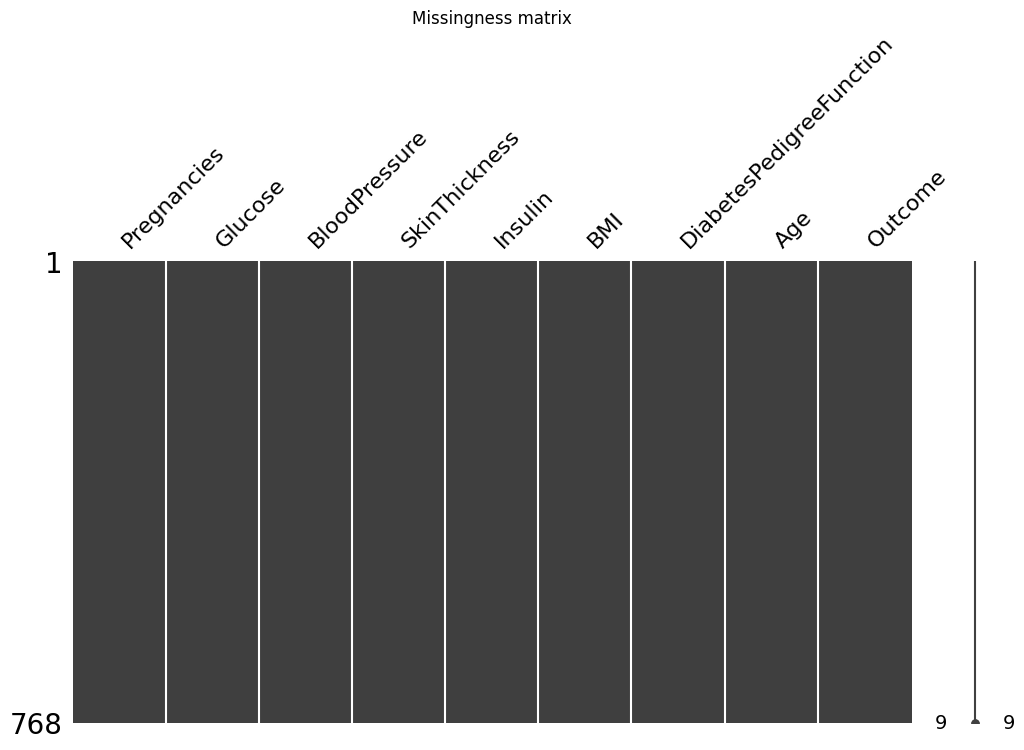

In [ ]:
# Visualizing the missing values using missingno

msno.matrix(df, figsize=(12,6))
plt.title("Missingness matrix")
plt.show()

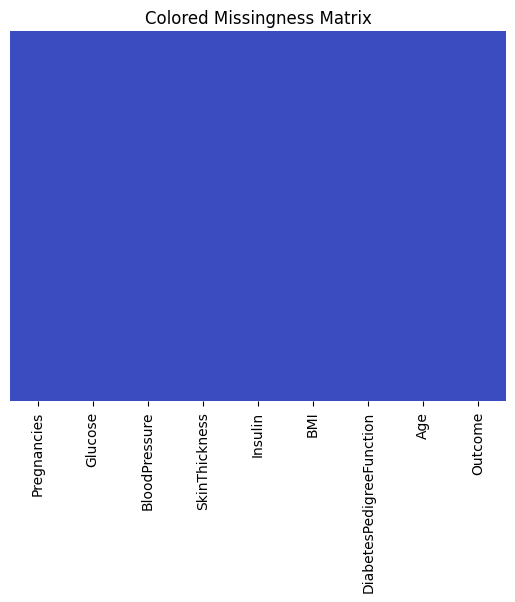

In [ ]:
# Visualizing the missing values with heatmap using seaborn
sns.heatmap(df.isnull(),
            cmap="coolwarm",  # any matplotlib colormap
            cbar=False,
            yticklabels=False)

plt.title("Colored Missingness Matrix")
plt.show()

## Finding total duplicates in the dataset

In [ ]:
#Duplicates in the dataset

print("Duplicates in the Dataset:",df.duplicated().sum())

#Dropping the duplicates , if exists
df= df.drop_duplicates()

Duplicates in the Dataset: 0


## Understanding the variables

In [ ]:
# Dataset Columns

print("\nFeatures in Source Dataset: ",df_pima.columns.tolist())

print("\nFeatures in Copy of DataSet: ",df.columns.tolist())


Features in Source Dataset:  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Features in Copy of DataSet:  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [ ]:
#  Describing dataset

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **What did i know about the Dataset?**

--------------------------------------------------------------
### **PIMA Diabetes Dataset – Summary**


**Dataset**

The PIMA Indians Diabetes Database contains 768 medical records of women (≥21 years) of Pima Indian heritage, collected by NIDDK and hosted on the UCI Repository.


**Structure**

8 medical predictors: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age.

1 target: Outcome (0 = non-diabetic, 1 = diabetic).


**Coverage**

Focuses on health attributes known to influence diabetes risk, within a specific population group.

**Purpose**

Used to analyze risk factors, discover patterns in health data, and build predictive models for diabetes detection.

**Value**

Widely applied in medical research, machine learning education, and predictive healthcare solutions.

--------------------------------------------------------------------


# **Problem Statement**


Diabetes is a growing global health issue. Early detection is critical but often missed due to subtle symptoms. The dataset enables prediction of diabetes onset based on key health indicators, helping support early diagnosis and preventive healthcare.

--------------------------------------------------------------------------

# **Detect and Treat Outliers**



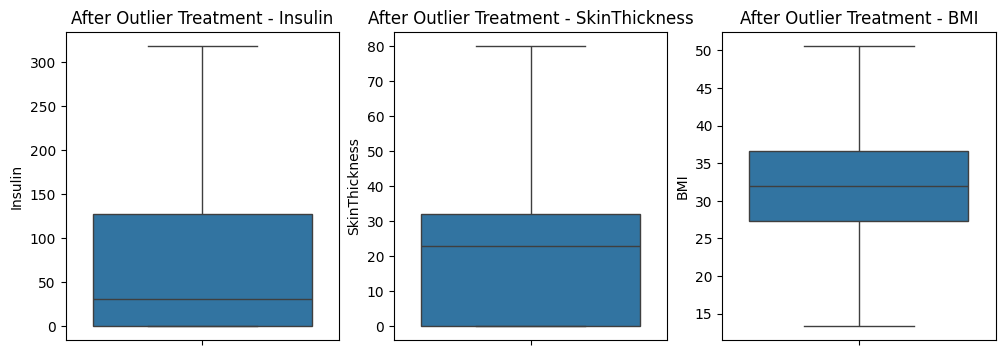

In [ ]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] < lower) | (data[col] > upper)]


'''

# Example: Detect outliers in Insulin
outliers_insulin = detect_outliers_iqr(df, "Insulin")
print("Number of insulin outliers:", len(outliers_insulin))

'''


# Treat outliers by capping (Winsorization)
for col in ["Insulin", "SkinThickness", "BMI"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper,
                       np.where(df[col] < lower, lower, df[col]))


# Visualize after treatment
plt.figure(figsize=(12,4))
for i, col in enumerate(["Insulin", "SkinThickness", "BMI"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(df[col])
    plt.title(f"After Outlier Treatment - {col}")
plt.show()


**Insight:**

Outliers mainly occur in Insulin, SkinThickness, BMI.

They are detected via IQR .

Best treatment for this dataset: Capping (Winsorization), since the dataset is small and dropping rows may lose valuable info.

Capping (Winsorization) is an outlier treatment technique where extreme values are replaced with the nearest acceptable boundary — for example, values above the upper limit are set to the upper limit, and values below the lower limit are set to the lower limit — instead of removing them.

### Outcome Distribution

In [ ]:

fig = px.histogram(df, x="Outcome", color="Outcome",
                   title="Distribution of Diabetes Outcome", barmode="group")
fig.show()


**Insight:** ~65% non-diabetic, 35% diabetic — dataset is imbalanced.

## Univariate Analysis

In [ ]:

for col in df.columns:
    fig = px.histogram(df, x=col, nbins=30, title=f"Distribution of {col}")
    fig.show()
    print("\n\n\n")


**Insight:** Glucose, Insulin, and BMI show skewness; outliers visible.

In [ ]:

for col in df.columns[:-1]:
    fig = px.box(df, y=col, title=f"Boxplot of {col}")
    fig.show()
    print("\n\n\n")


**Insight:** Outliers detected in Insulin and SkinThickness.

## 🔗 Bivariate Analysis

In [ ]:

fig = px.scatter(df, x="BMI", y="Glucose", color="Outcome",
                 size="Age", hover_data=["Insulin"],
                 title="BMI vs Glucose by Outcome")
fig.show()


**Insight:** Diabetics cluster at higher BMI and Glucose values.

In [ ]:

for col in ["Glucose","BMI","Age"]:
    fig = px.violin(df, x="Outcome", y=col, color="Outcome", box=True, points="all")
    fig.show()


**Insight:** Clear separation in Glucose, BMI, Age distributions across Outcome groups.

## Correlation Analysis

In [ ]:

corr = df.corr()
fig = px.imshow(corr, text_auto=True, title="Correlation Heatmap of Features")
fig.show()


**Insight:** Glucose and BMI have the strongest correlation with Outcome.

##  Multivariate Analysis

In [ ]:

fig = px.parallel_categories(df[["Pregnancies","BMI","Age","Outcome"]],
                             color="Outcome", title="Multivariate Feature Comparison")
fig.show()


**Insight:** Older individuals with higher BMI show stronger diabetes association.

In [ ]:

fig = px.scatter_3d(df, x="Glucose", y="BMI", z="Age", color="Outcome",
                    size="Insulin", title="3D Scatter: Glucose, BMI, Age by Outcome")
fig.show()


**Insight:** 3D plot shows clear separation of diabetics vs non-diabetics.

## Group Analysis

In [ ]:

df["AgeGroup"] = pd.cut(df["Age"], bins=[20,30,40,50,60,80],
                        labels=["20-30","30-40","40-50","50-60","60+"])

fig = px.histogram(df, x="AgeGroup", color="Outcome",
                   barmode="group", title="Outcome Distribution Across Age Groups")
fig.show()


**Insight:** Higher prevalence of diabetes in 40+ age groups.

In [ ]:

preg_group = df.groupby("Pregnancies")["Outcome"].mean().reset_index()
fig = px.bar(preg_group, x="Pregnancies", y="Outcome",
             title="Probability of Diabetes by Pregnancies",
             labels={"Outcome":"Diabetes Probability"})
fig.show()


**Insight:** Probability of diabetes increases with pregnancies.

## Additional Visualizations

# Pairplots

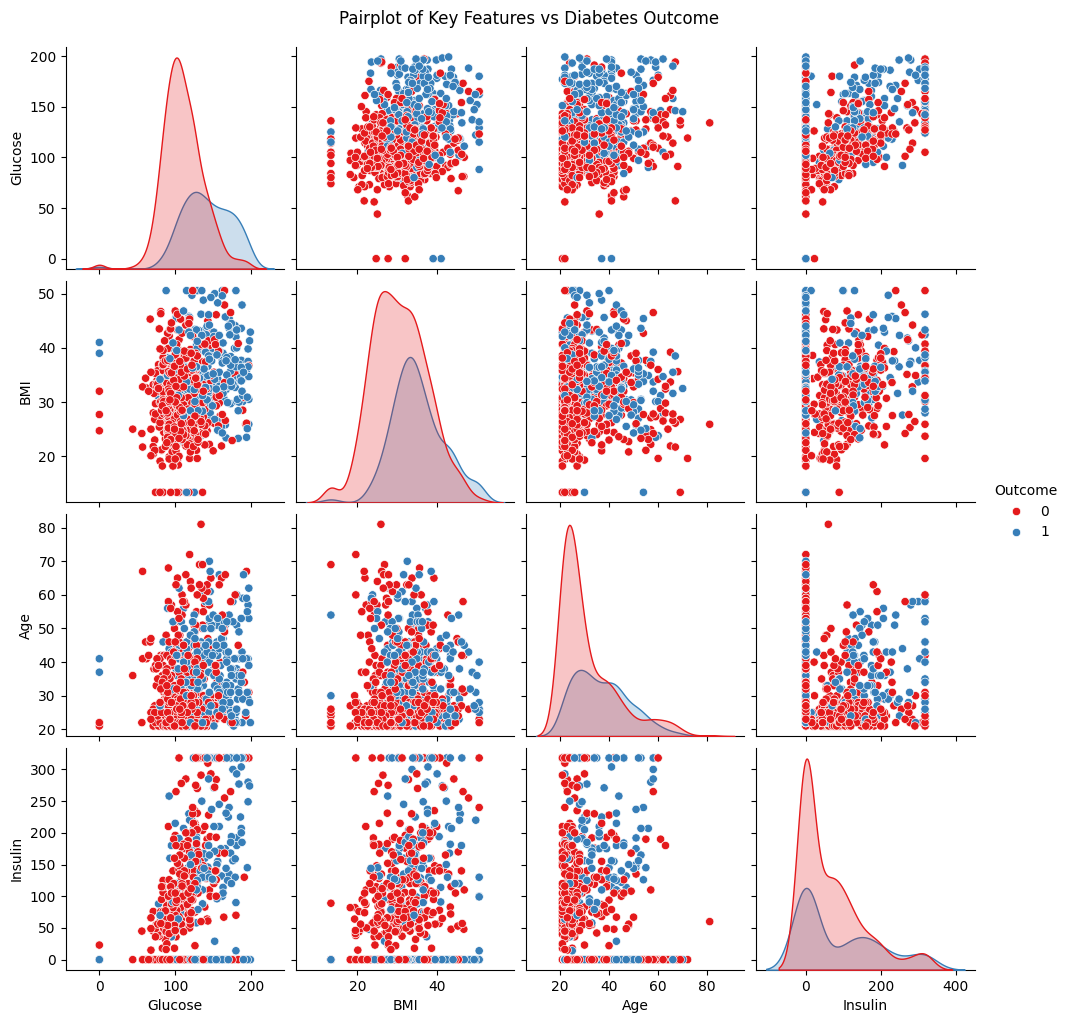

In [ ]:
# Pairplot
sns.pairplot(df, vars=["Glucose", "BMI", "Age", "Insulin"],
             hue="Outcome", diag_kind="kde", palette="Set1")

plt.suptitle("Pairplot of Key Features vs Diabetes Outcome", y=1.02)
plt.show()

###  Strip Plot (Age vs Outcome)

In [ ]:

fig = px.strip(df, x="Outcome", y="Age", color="Outcome",
               title="Age Spread by Outcome", stripmode="overlay")
fig.show()


**Insight:** Non-diabetics are younger on average, diabetics spread to higher ages.

### 3. Facet Histogram (Age by Outcome)

In [ ]:

fig = px.histogram(df, x="Age", facet_col="Outcome", color="Outcome", nbins=20,
                   title="Age Distribution by Outcome")
fig.show()


**Insight:** Side-by-side comparison shows diabetics concentrate more at older ages.

### 5. Treemap (Pregnancies vs Outcome)

In [ ]:

fig = px.treemap(df, path=["Pregnancies","Outcome"], values="BMI",
                 color="Outcome", title="Pregnancies vs Outcome Treemap")
fig.show()


**Insight:** Helps visualize the contribution of pregnancies to diabetes distribution.

### 6. Boxen Plot (Insulin by Outcome)

In [ ]:

fig = px.box(df, x="Outcome", y="Insulin", color="Outcome", points="all", notched=True,
             title="Insulin Spread by Outcome (Boxen Style)")
fig.show()


**Insight:** Confirms extreme outliers and spread in Insulin values.

### 7. Cumulative Distribution (Glucose by Outcome)

In [ ]:

import plotly.figure_factory as ff

glucose_0 = df[df["Outcome"]==0]["Glucose"]
glucose_1 = df[df["Outcome"]==1]["Glucose"]

fig = ff.create_distplot([glucose_0, glucose_1], group_labels=["Diabetic","Non-Diabetic"], show_hist=False)
fig.update_layout(title="Cumulative Distribution of Glucose by Outcome")
fig.show()


**Insight:** Diabetics consistently dominate higher glucose ranges.

### 8. Scatter with Regression Trendline (Glucose vs Age)

In [ ]:

fig = px.scatter(df, x="Age", y="Glucose", color="Outcome", trendline="ols",
                 title="Glucose vs Age with Trendline")
fig.show()


**Insight:** Positive trend confirms that older individuals have higher glucose levels, increasing diabetes risk.

##  Hypothesis Testing

In [ ]:
from scipy import stats

# Replace 0 with NaN in Glucose column (since 0 is not physiologically valid)
df["Glucose"] = df["Glucose"].replace(0, np.nan)

# Select only diabetics (Outcome = 1)
glucose_diabetic = df[df["Outcome"] == 1]["Glucose"].dropna()

# Hypotheses:
#H₀: Mean glucose in diabetic patients = 140

#H₁: Mean glucose in diabetic patients > 140



# One-sample t-test
tstat, p_two_sided = stats.ttest_1samp(glucose_diabetic, popmean=140)

# One-sided p-value (greater than 140)
if tstat > 0:
    p_one_sided = p_two_sided / 2
else:
    p_one_sided = 1 - (p_two_sided / 2)

# Print results
alpha = 0.05
if p_one_sided < alpha:
    print("Conclusion: Reject H0 → Mean glucose is significantly greater than 140")
else:
    print("Conclusion: Fail to reject H0 → No significant evidence mean > 140")

Conclusion: Fail to reject H0 → No significant evidence mean > 140


**Insight:**

Although the mean glucose (142.3) is higher than 140, the difference is not statistically significant at the 5% level.


##  Conclusion

**Key Findings:**  
1. Glucose, BMI, and Age are the strongest indicators of diabetes.  
2. Higher pregnancies increase diabetes risk.  
3. Age groups above 40 have greater prevalence.  
4. Correlation analysis highlights Glucose as most associated with Outcome.  

**Hypothesis Testing:**  
Glucose levels differ significantly between diabetic and non-diabetic groups (p < 0.001).  

**Business Impact:**  
- Healthcare providers can focus on glucose & BMI management.  
- Policy makers can design awareness programs for at-risk age groups.  
- Researchers can use findings for machine learning models & causal studies.  
